In [1]:
from grad_descent_lib.plot_func import plot_cost_and_derivative
from grad_descent_lib.plot_func import plot_gradient_descent_trajectories
from grad_descent_lib.plot_func import plot_cost_comparison
from grad_descent_lib.algo import gradient_descent
import numpy as np

# Case Study 1: How Starting Point Affects Gradient Descent Efficiency

Gradient Descent is an iterative optimization algorithm. In this case study, we demonstrate how the **initial starting point** directly affects the **number of iterations** required to reach the minimum.

We define a basic quadratic function as a simulated cost function:

$$f(x) = x^2 + x + 1$$

Its derivative (gradient):

$$f’(x) = 2x + 1$$

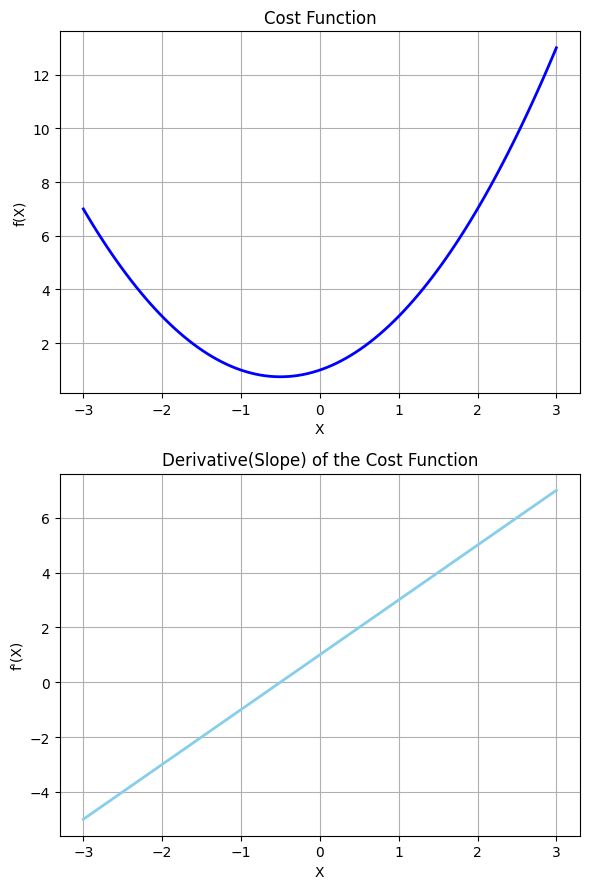

In [2]:
def f(x):
    return x**2 + x + 1

def df(x):
    return 2*x + 1

plot_cost_and_derivative(f, df)

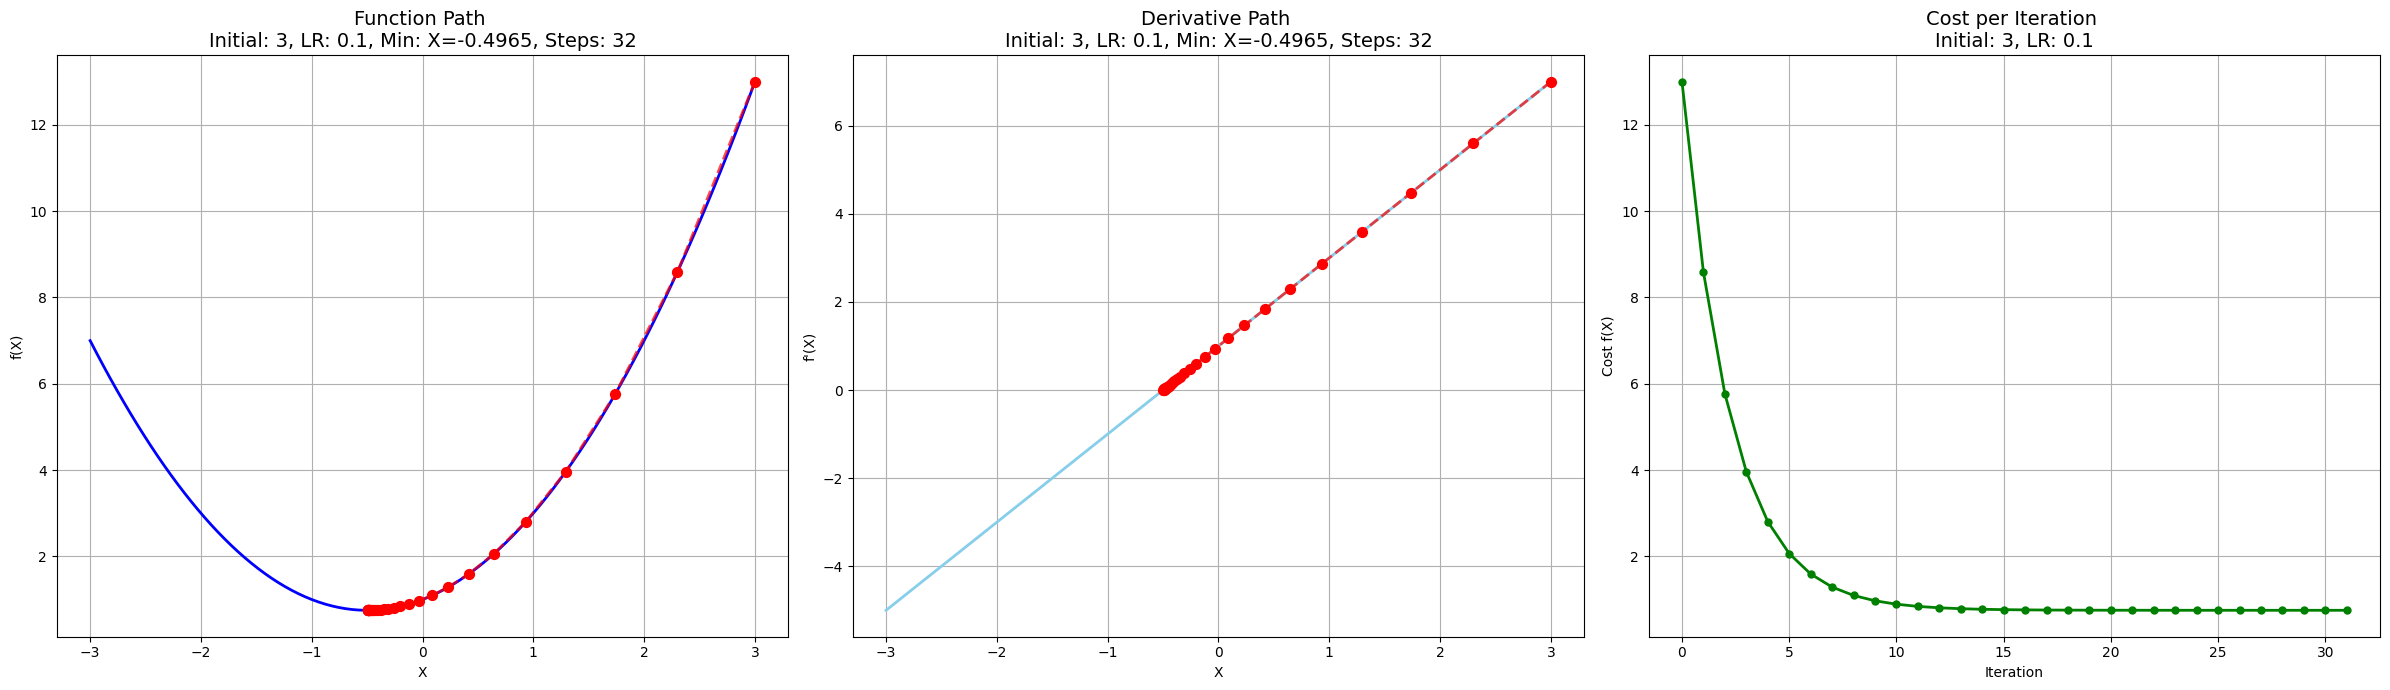

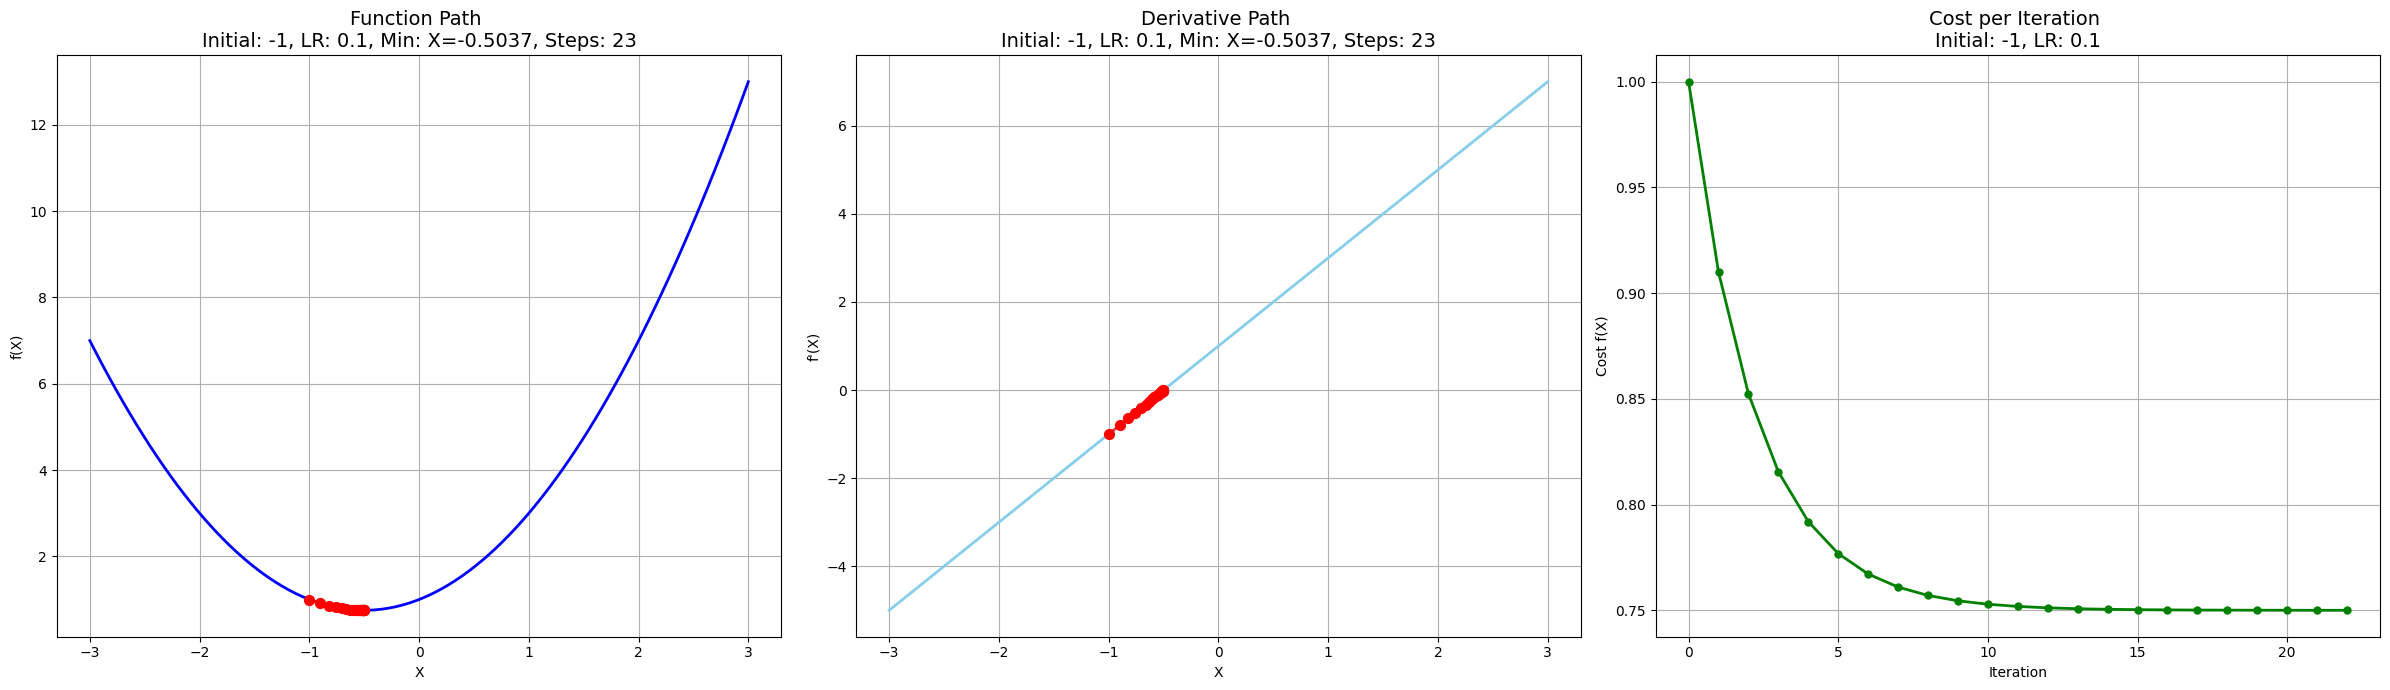

In [3]:
x_range = np.linspace(-3, 3, 100)

local_min_f1, x_list_f1, slope_list_f1, iter_f1 = gradient_descent(derivative_func=df, initial_guess=3, learning_rate=0.1)
local_min_f2, x_list_f2, slope_list_f2, iter_f2 = gradient_descent(derivative_func=df, initial_guess=-1, learning_rate=0.1)

plot_gradient_descent_trajectories(f, df, x_list_f1, slope_list_f1, x_range, 3, iter_f1, local_min_f1, learning_rate=0.1)
plot_gradient_descent_trajectories(f, df, x_list_f2, slope_list_f2, x_range, -1, iter_f2, local_min_f2, learning_rate=0.1)

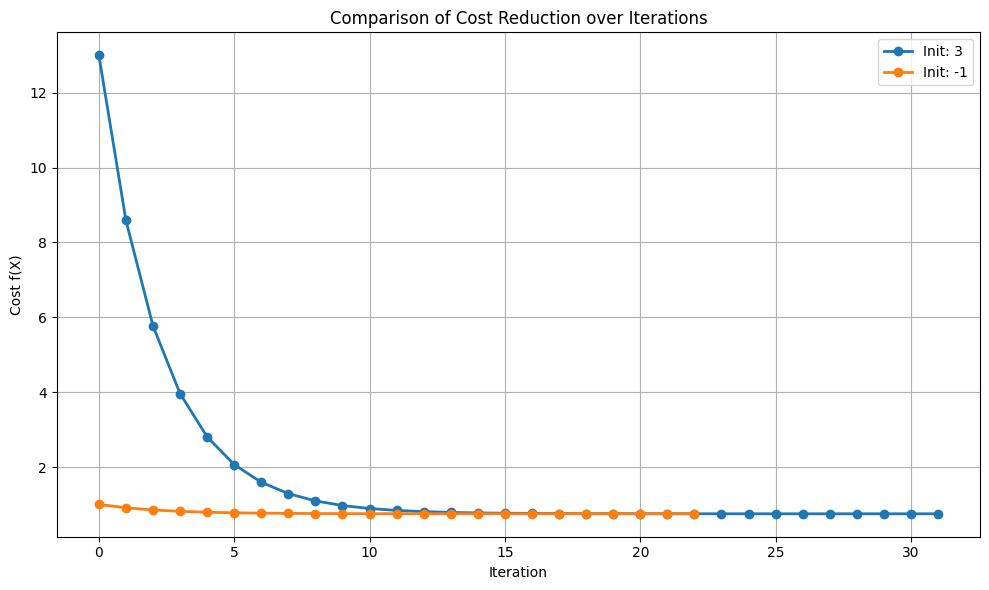

In [4]:
plot_cost_comparison(f, [x_list_f1, x_list_f2], labels=['Init: 3', 'Init: -1'])

# Case Study 2: Divergence and Overflow in Gradient Descent

In this case study, we explore a **non-convex cost function** that exhibits **divergence** when the learning rate is too high, causing the algorithm to **overflow** instead of converge.

The cost function is defined as:

$$
t(x) = x^5 - 2x^4 + 2
$$

Its derivative (gradient) is:

$$
t'(x) = 5x^4 - 8x^3
$$

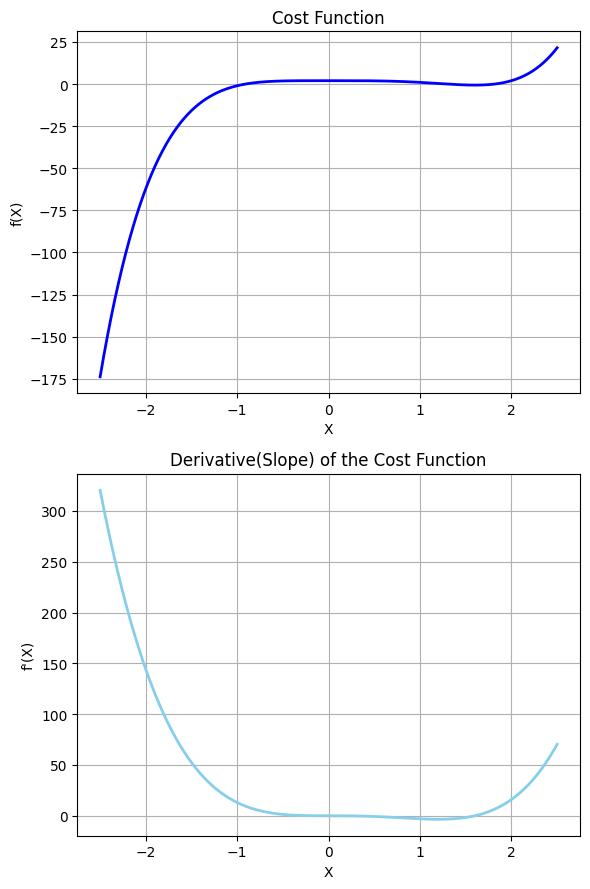

In [5]:
def t(x):
    return x**5 - 2*x**4 + 2

def dt(x):
    return 5*x**4 - 8*x**3

plot_cost_and_derivative(t, dt, x_range=(-2.5,2.5),num_points=1000)

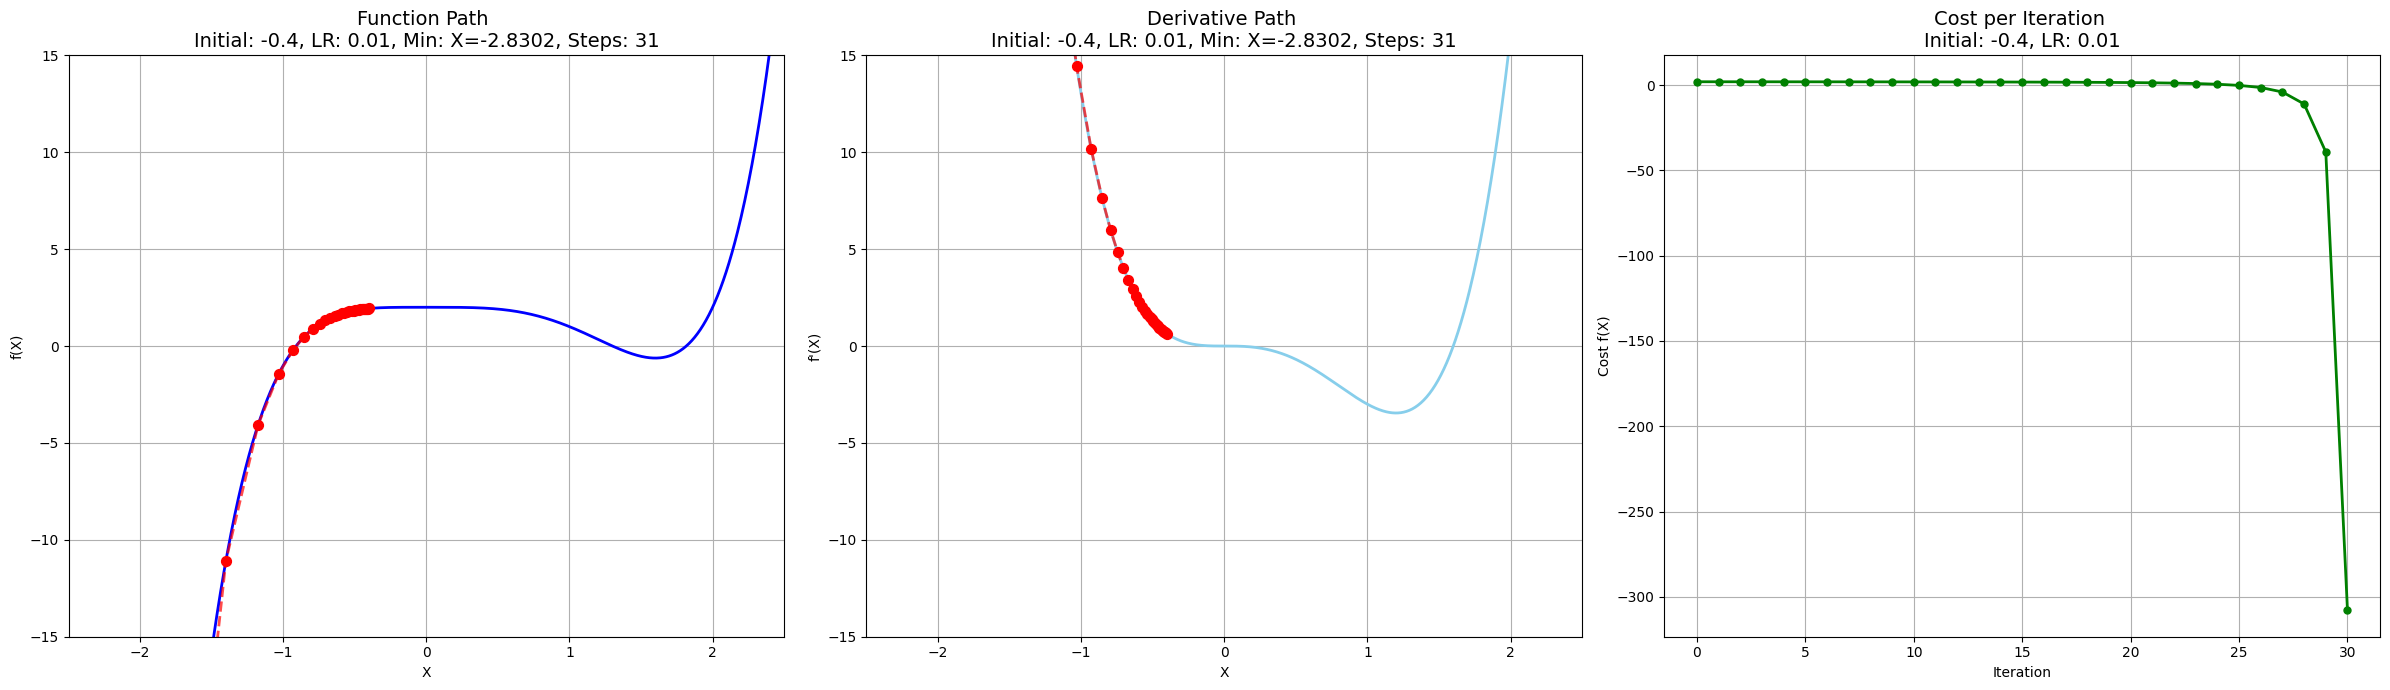

In [6]:
x_range = np.linspace(start=-2.5, stop=2.5, num=1000)

local_min_t, x_list_t, slope_list_t, iter_t = gradient_descent(derivative_func=dt, initial_guess=-0.4, learning_rate=0.01, precision=0.001, max_iter= 30)

plot_gradient_descent_trajectories(t, dt, x_list_t, slope_list_t, x_range, -0.4, iter_t, local_min_t, 0.01, x_lim=(-2.5, 2.5), y_lim=(-15,15))

# Case Study 3: Impact of Learning Rate on Gradient Descent

In this case study, we explore how the **choice of learning rate** affects the convergence behavior of gradient descent, using the non-convex cost function:

$$
h(x) = x^4 - 4x^2 + 5
$$

Its derivative is:

$$
h'(x) = 4x^3 - 8x
$$

The learning rate $\alpha$(alpha) or $ \gamma $(gamma) controls how large each update step is. It has a profound impact on the efficiency and stability of optimization.

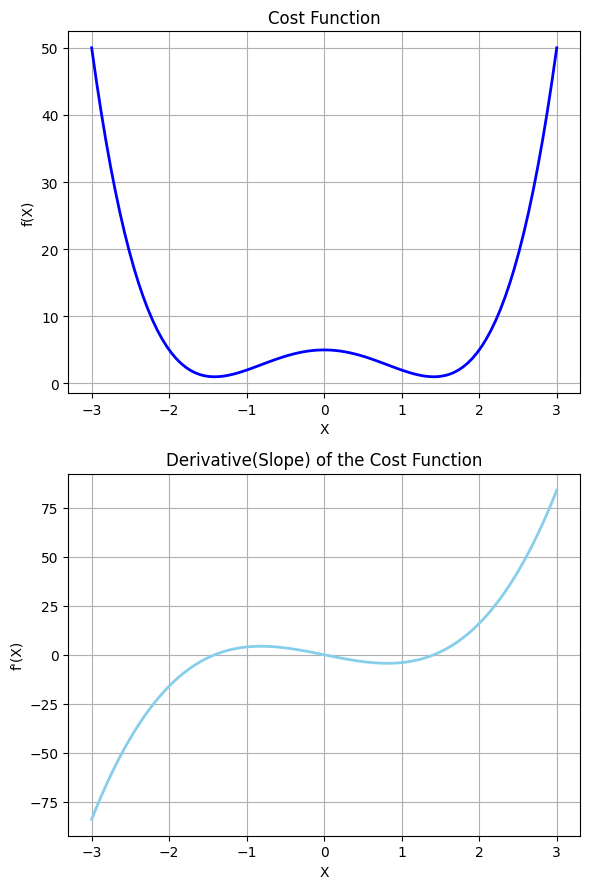

In [7]:
def h(x):
    return x**4 - 4 * x**2 + 5

def dh(x):
    return 4 * x**3 - 8 * x

plot_cost_and_derivative(h, dh, x_range=(-3,3),num_points=100)

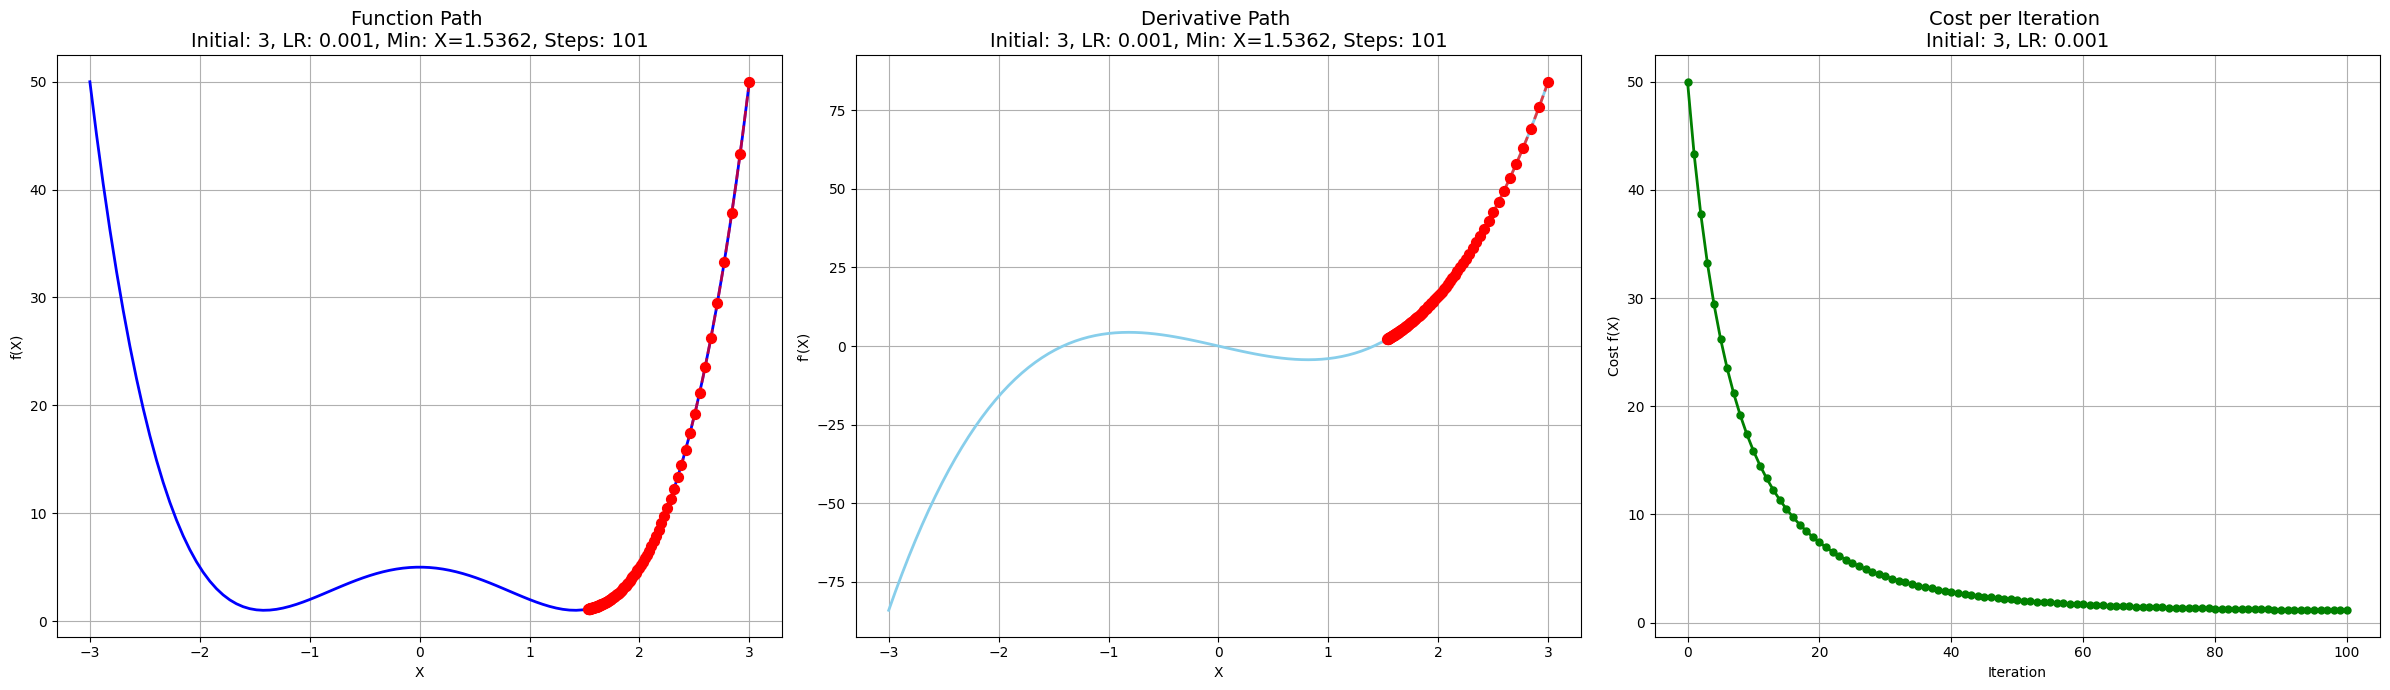

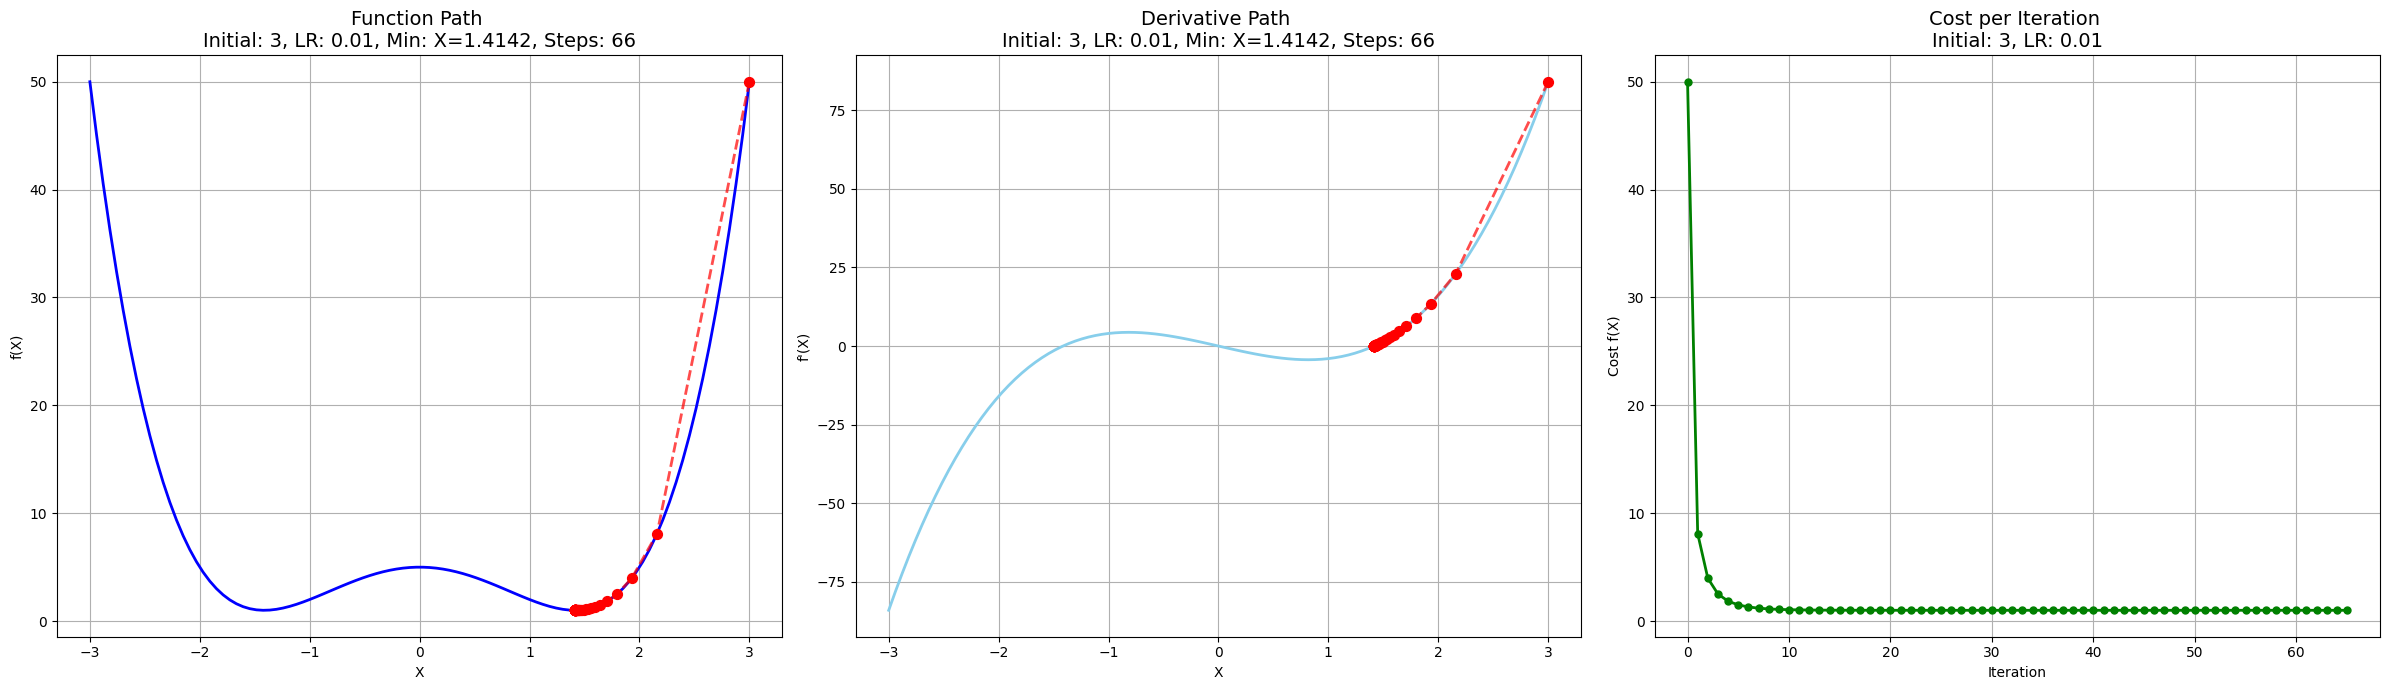

In [8]:
x_range = np.linspace(-3, 3, 100)

local_min_h1, x_list_h1, slope_list_h1, iter_h1 = gradient_descent(derivative_func=dh, initial_guess=3, learning_rate=0.001, precision=0.000001, max_iter=100)
local_min_h2, x_list_h2, slope_list_h2, iter_h2 = gradient_descent(derivative_func=dh, initial_guess=3, learning_rate=0.01, precision=0.000001, max_iter=100)

plot_gradient_descent_trajectories(h, dh, x_list_h1, slope_list_h1, x_range, 3, iter_h1, local_min_h1, learning_rate=0.001)
plot_gradient_descent_trajectories(h, dh, x_list_h2, slope_list_h2, x_range, 3, iter_h2, local_min_h2, learning_rate=0.01)

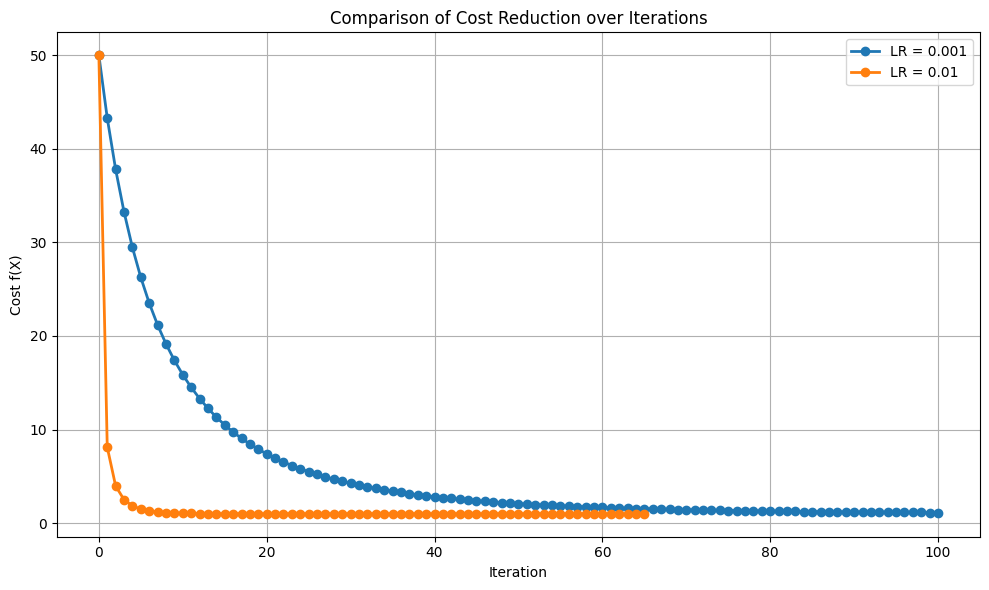

In [9]:
plot_cost_comparison(f=h,x_lists=[x_list_h1, x_list_h2],labels=['LR = 0.001', 'LR = 0.01'])

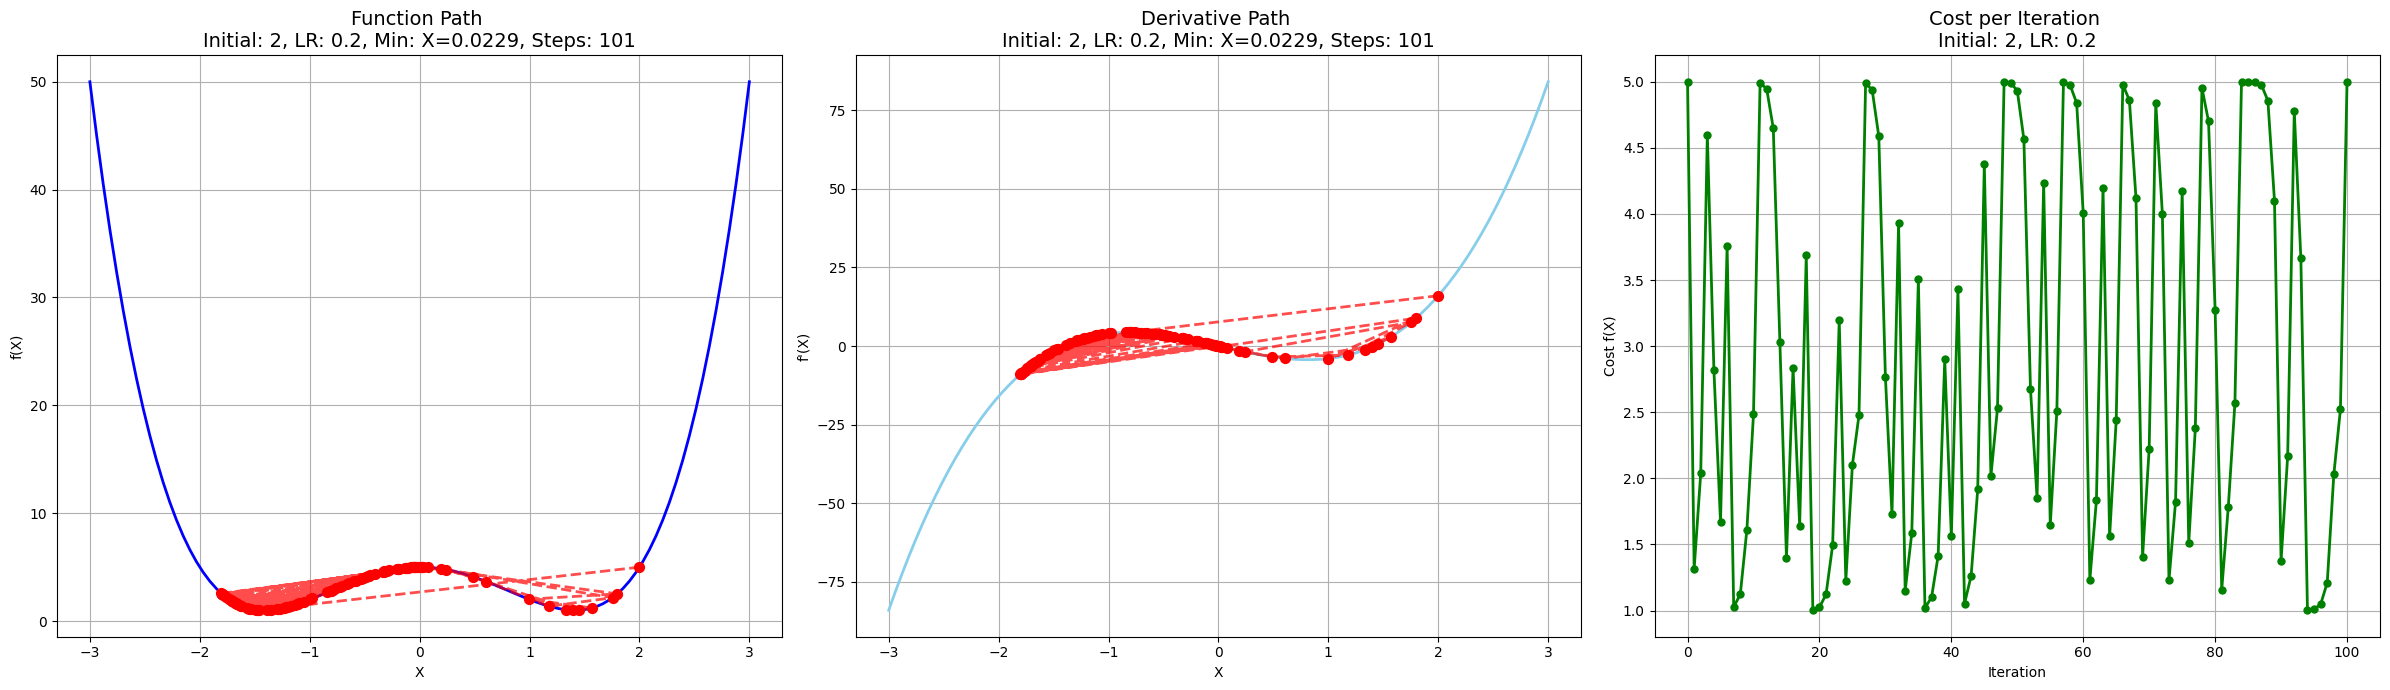

In [10]:
x_range = np.linspace(-3, 3, 100)

local_min_h3, x_list_h3, slope_list_h3, iter_h3 = gradient_descent(derivative_func=dh, initial_guess=2, learning_rate=0.2, precision=0.000001, max_iter=100)

plot_gradient_descent_trajectories(h, dh, x_list_h3, slope_list_h3, x_range, 2, iter_h3, local_min_h3, learning_rate=0.2)

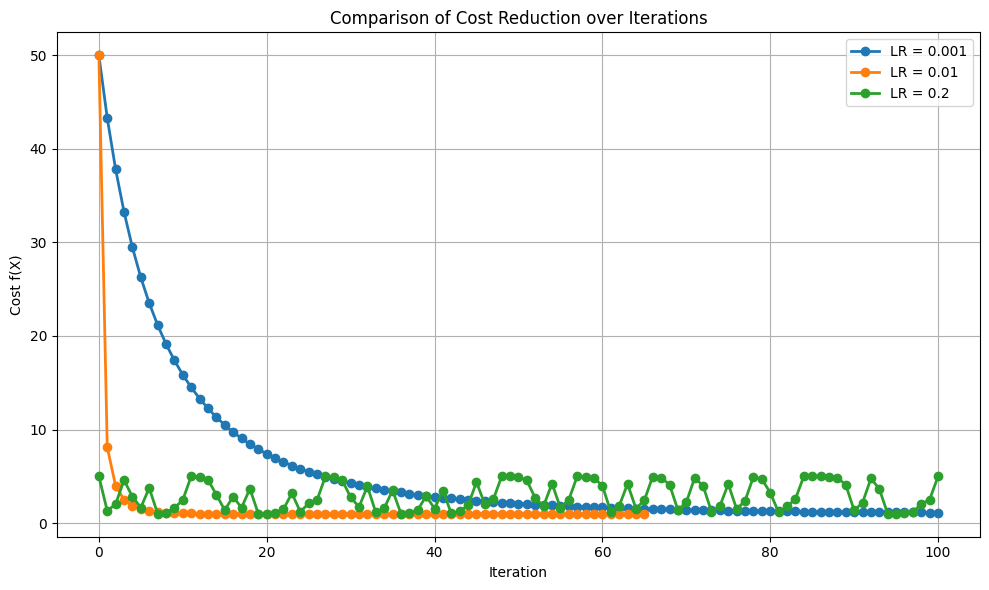

In [11]:
plot_cost_comparison(f=h,x_lists=[x_list_h1, x_list_h2, x_list_h3],labels=['LR = 0.001', 'LR = 0.01', 'LR = 0.2'])

# Case Study 4: Multiple Minima in a Non-Convex Cost Function

We now analyze a new cost function, This is a **non-convex** function — it has more than one valley (local minimum), unlike a simple U-shaped parabola:

$$g(x) = x^4 - 4x^2 + 0.5x + 5$$

Its derivative (gradient):

$$g{\prime}(x) = 4x^3 - 8x + 0.5$$

We want to understand:
1. Can Gradient Descent always find the global minimum?
2. What happens when the function has more than one valley (local minimum)?
3. How do different initial guesses affect convergence?

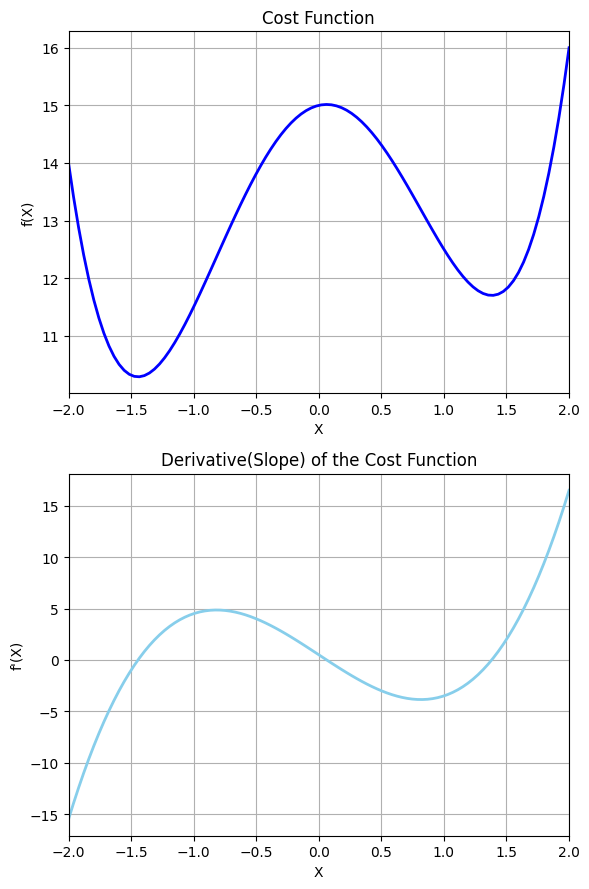

In [11]:
def g(x):
    return x**4 - 4*x**2 + 0.5*x + 15

def dg(x):
    return 4*x**3 - 8*x + 0.5

plot_cost_and_derivative(g, dg, x_range=(-2,2),num_points=100, xlim=(-2,2))

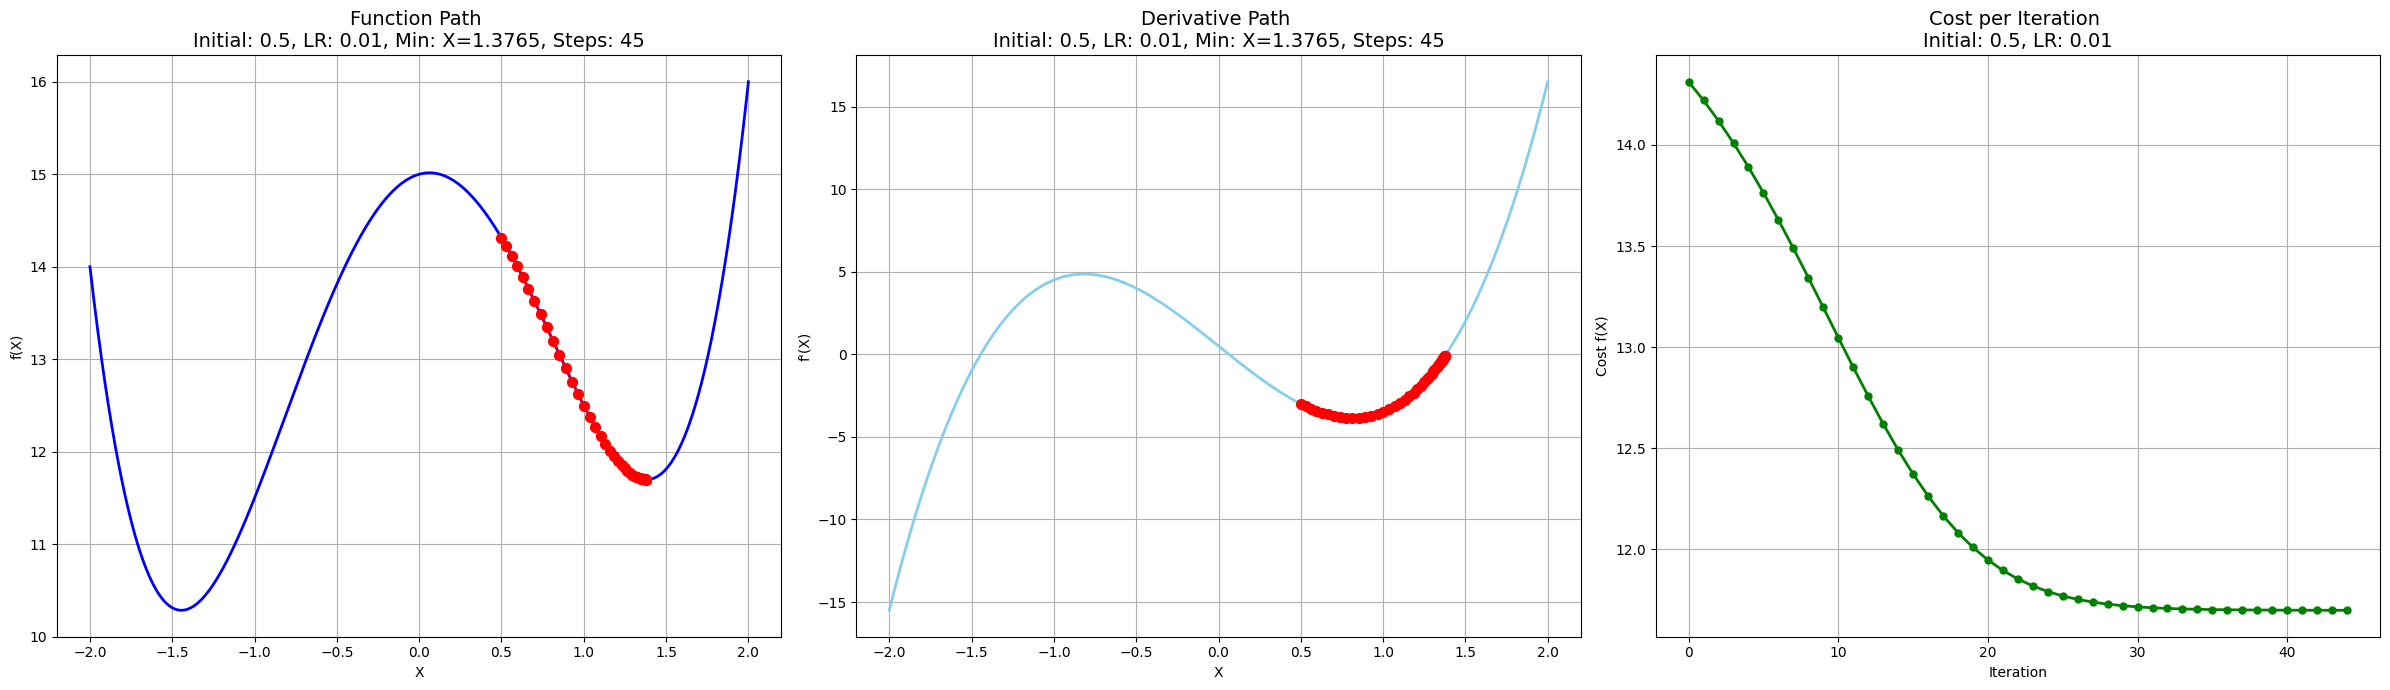

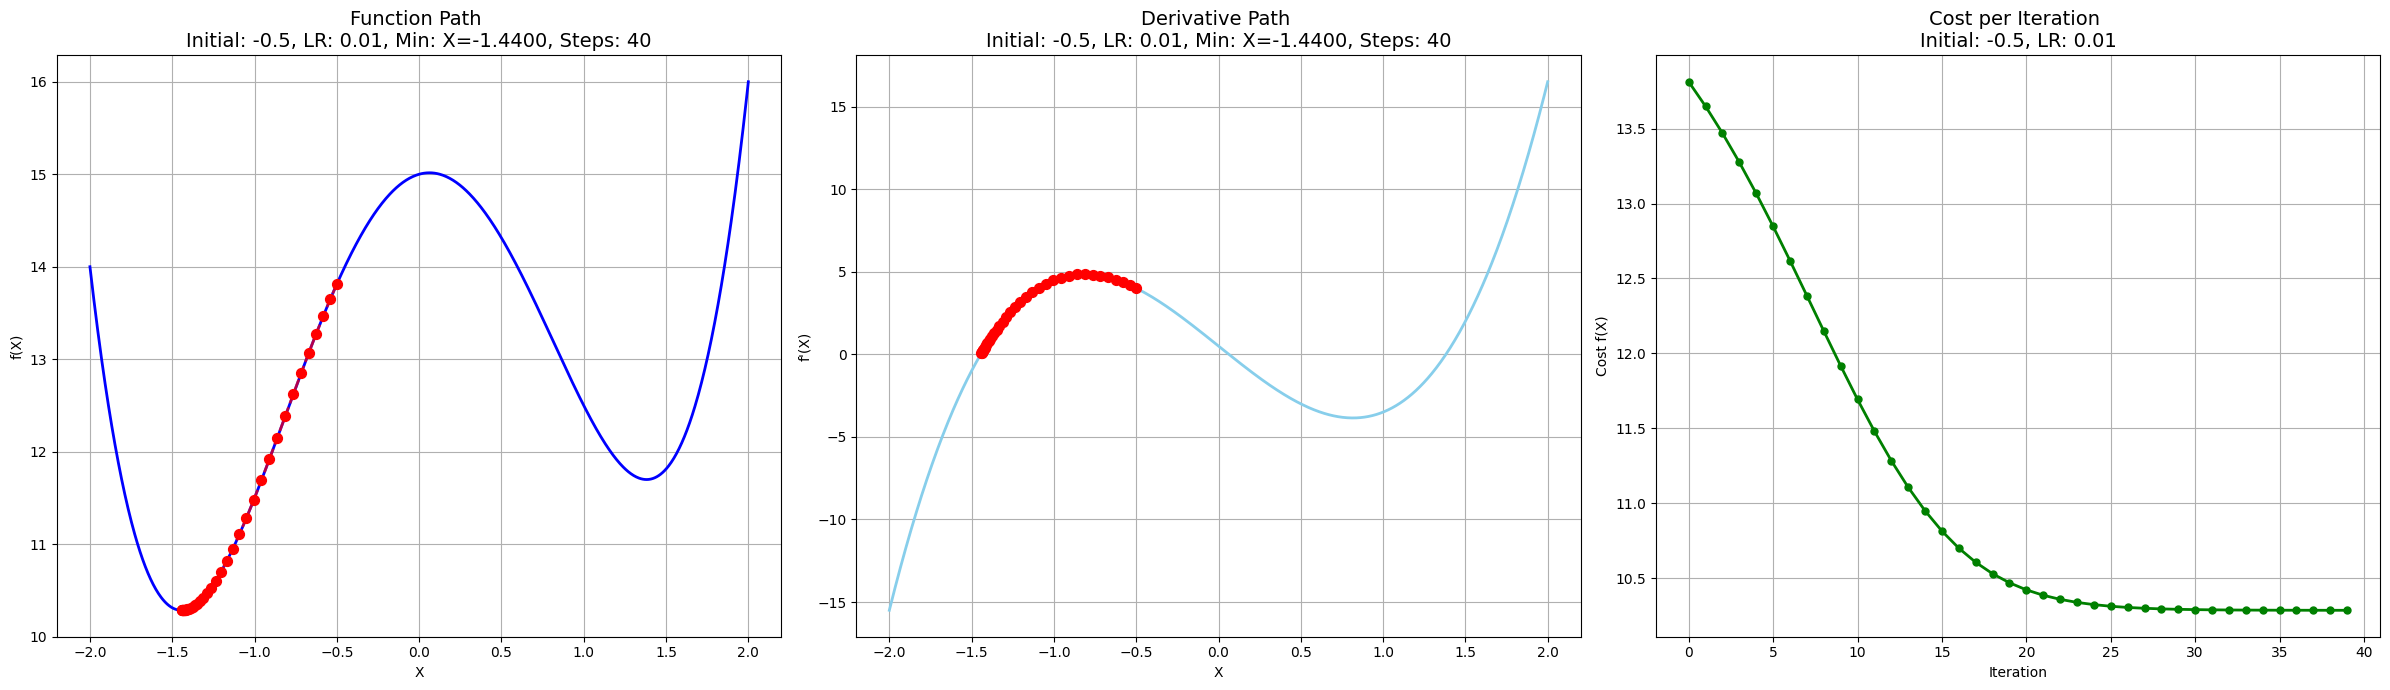

In [12]:
x_range = np.linspace(-2, 2, 1000)

local_min_g1, x_list_g1, slope_list_g1, iter_g1 = gradient_descent(derivative_func=dg, initial_guess=0.5, learning_rate=0.01, max_iter= 100)
local_min_g2, x_list_g2, slope_list_g2, iter_g2 = gradient_descent(derivative_func=dg, initial_guess=-0.5, learning_rate=0.01, max_iter= 100)

plot_gradient_descent_trajectories(g, dg, x_list_g1, slope_list_g1, x_range, 0.5, iter_g1, local_min_g1, 0.01)
plot_gradient_descent_trajectories(g, dg, x_list_g2, slope_list_g2, x_range, -0.5, iter_g2, local_min_g2, 0.01)